In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import iv
import multiprocessing as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import gridspec
from astropy.modeling.models import BlackBody
from astropy.modeling.blackbody import FLAM
from astropy import units as u
from astropy.visualization import quantity_support
from astropy.modeling.blackbody import blackbody_lambda
#np.save('dataall_save', dataall)
#%matplotlib nbagg
%matplotlib inline

1.0 0.0900796478416492
4.144654088050315 0.010688615649916293
7.28930817610063 0.004583494936704882
32.44654088050315 0.0004881435212575535
315.46540880503153 1.6102441509939614e-05


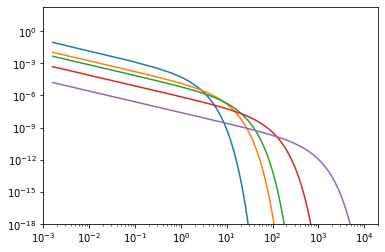

In [2]:
rnum=400
#dx=0.025
dx=0.25
x1=np.arange(rnum)*dx+0.04
r=x1**2
sig=np.zeros(rnum)
sig1=np.zeros(rnum)
time=np.arange(10)
m=1
r0=10
sig0=1
pi=np.pi
#nu=1
#nu1=1e-5*(3/4)*0.98
nu1=1e-2*(3/4)*0.98
#nu1=1e-5*0.98
C=1e-5 #k数　高さ変わるだけ
sigs=np.zeros((7, rnum))


time=[1.0,
4.144654088050315,
7.28930817610063,
32.44654088050315,
315.46540880503153]
for t in time:#tによって解の曲がるの位置変わる
    for x in range(rnum):
        #sig[x]=(C/(3.*pi*nu1*r[x]*11.89))*(t**(-3./2.))*np.exp(-(r[x]*11.89)/(t))#解析解
        sig[x]=(C/(3.*pi*nu1*r[x]))*(t**(-3./2.))*np.exp(-(r[x])/(t))#解析解
        sig1[x]=(C/(3.*pi*nu1*r[x]))*(t**(-3./2.))#解析解
        
    if t==1:
        sig0=sig*1.0
        #sig0=sig*r
    #print(t,sig[38])
    plt.xscale("log")
    plt.yscale("log")  


    plt.xlim(1e-3,2e4)#1     
    plt.ylim(1e-18,2e2)#1
    ##plt.xlim(1e-3,1e1)#2      
    ##plt.ylim(1e-3,2e2)#2
    ##plt.xlim(1e-3,1e1)#3      
    ##plt.ylim(1e-3,2e2)#3
    #print(t,sig[0],sig[1],sig[0]*r[0],sig[1]*r[1],sig[1]*r[1]-sig[0]*r[0])
    print(t,sig[0])
    #print(t,sig[4]*r[4],sig[5]*r[5],sig[5]*r[5]-sig[4]*r[4])
    plt.plot(r,sig)
    #plt.plot(r,sig1, linestyle = "dotted")

1.0 5.5273774522472366e-05
4.144654088050315 1.3779696830437248e-05
7.28930817610063 6.542559107520582e-06
32.44654088050315 7.732144738550549e-07
315.46540880503153 2.6205608209097935e-08
[[  61.         -158.4375        0.         ...    0.
     0.            0.        ]
 [ -22.72189349  121.         -115.0295858  ...    0.
     0.            0.        ]
 [   0.          -31.2962963   121.         ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  121.
   -60.30143133    0.        ]
 [   0.            0.            0.         ...  -59.70007545
   121.          -60.30067605]
 [   0.            0.            0.         ...    0.
   -59.7008232    61.        ]]
[[1.21034789e-01 2.80923865e-01 4.73389506e-01 ... 6.54139760e-19
  6.36387038e-19 6.29091289e-19]
 [4.02879504e-02 1.08158458e-01 1.82259628e-01 ... 2.51850259e-19
  2.45015286e-19 2.42206350e-19]
 [1.84709211e-02 4.95876891e-02 9.82104649e-02 ... 1.35709324e-19
  1.32026304e-19 1.3051

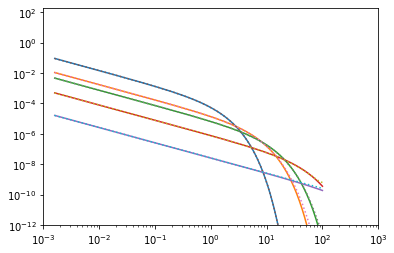

In [26]:
#inplicit
dx=0.025
mesh=400
x1=np.arange(mesh)*dx+0.04
r=x1**2
sig=np.zeros(mesh)
sig1=np.zeros(mesh)
time=np.arange(10)
m=1
r0=10
sig0=1
pi=np.pi
#nu=1
nu1=1e-2*(3/4)*0.98
#nu1=1e-5*0.98
C=1e-5
sigs=np.zeros((7, mesh))
#time=[1.0,1.214263850627487,1.428527701254974,1.642791551882461,1.857055402509948,2.071319253137435]

time=[1.0,
4.144654088050315,
7.28930817610063,
32.44654088050315,
315.46540880503153]

frag=0
for t in time:
    for x in range(mesh):
        sig[x]=(C/(3.*pi*nu1*r[x]))*(t**(-3./2.))*np.exp(-(r[x])/(t))#解析解
        sig1[x]=(C/(3.*pi*nu1*r[x]))*(t**(-3./2.))#解析解 gensui nasi
    if frag==0:
        sig0=sig*1.0
        sig10=sig1
    plt.xscale("log")
    plt.yscale("log")  
    frag+=1
    plt.xlim(1e-3,1e1)#3      
    plt.ylim(1e-3,2e2)#3
    print(t,sig[38])
    plt.plot(r,sig)
#dt=1.0
dt=50.
alpha=1.e-3
#inplicit

X=np.zeros((mesh,mesh))
mu=np.zeros(mesh)
k=np.zeros(mesh)
for j in range(mesh):
    mu[j]=(3*alpha*dt)/(4*r[j]*dx*dx)
for j in range(mesh):#j=mu
    for k in range(mesh):#k=r
        if j==k:
            X[j,k]=1+2*mu[j]*r[k]
        if j-1==k and j>0:#hidari
            #X[j,k]=-mu[j]*r[k]
            X[j,k]=-mu[j]*r[k]
            #X[j,k]=-mu[k]*r[j]xxxx
        if j+1==k and  j<mesh-1:#migi
            #X[j,k]=-mu[j]*r[k]
            X[j,k]=-mu[j]*r[k]
            #X[j,k]=-mu[k]*r[j]xxxx
        if j==k and j==0:
            X[j,k]=1+1*mu[j]*r[k]
        if j==k and j==mesh-1:
            X[j,k]=1+1*mu[j]*r[k]
print(X)
Xinv=np.linalg.inv(X)
print(Xinv)

for cc in [1]:
    print(cc)

    sig=np.zeros(mesh)
    time=np.arange(200)
    print(sig0[0])  
    t=0
    for i in range(8000):
        #print(t)
        if i==0:
            Sig=sig0 #初期値代入
            plt.plot(r,Sig, linestyle = "dotted")
        if i>0:
            Sig=sig
        sig=np.dot(Xinv,Sig)
        plt.xscale("log")
        plt.yscale("log")  
        #plt.xlim(1e-3,2e1)#1    
        #plt.ylim(1e-8,2e2)#1
        #plt.xlim(1e-3,2e4)#1     
        #plt.ylim(1e-18,2e2)#1
        plt.xlim(1e-3,1e3)#1     
        plt.ylim(1e-12,2e2)#1

        ##plt.xlim(1e-3,1e1)#2      
        ##plt.ylim(1e-3,2e2)#2
        #plt.xlim(1e-3,1e1)#3      
        #plt.ylim(1e-3,2e2)#3
        #if t%7000==0 :#and t!=0:
        #if t in [1400]:
        if t in [1000]:
            plt.plot(r,sig/4.08180, linestyle = "dotted")
            print(t,sig[38])
        if t in [2000]:
            plt.plot(r,sig/7.20255, linestyle = "dotted")
            print(t,sig[38])
        if t in [10000]:
            plt.plot(r,sig/32.16762, linestyle = "dotted")
            print(t,sig[38])
        if t in [100000]:
            plt.plot(r,sig/483.206987, linestyle = "dotted")
            #plt.plot(r,sig01-Sig)
            print(t,sig[38])
       
            
        t+=dt

In [4]:
i=38
alpha=1e-2
ts=(1/3)*(x1[i]*x1[i]/(alpha*x1[i]))
print(r[i],alpha*x1[i],ts,1/x1[i])#1au で規格化
#for t in [0,2000,4000,3000,6000,9000,12000,15000,18000]:
for t in [0,1000,2000,10000,100000]:
    print(1+(t/ts))

0.9801000000000002 0.0099 33.0 1.01010101010101
1.0
31.303030303030305
61.60606060606061
304.030303030303
3031.3030303030305


In [ ]:
4.144654088050315 1.3779696830437248e-05
7.28930817610063 6.542559107520582e-06
32.44654088050315 7.732144738550549e-07
315.46540880503153 2.6205608209097935e-08

1000.0 5.6246012495648576e-05
2000.0 4.712313419463688e-05
10000.0 2.4872476418119732e-05
100000.0 1.266273323755337e-05

In [23]:
print(5.62460e-05/1.3779696830437248e-05)
print(4.71231341e-05/6.542559107520582e-06)
print(2.4872476e-05/7.732144738550549e-07)
print(1.2662733e-05/2.6205608209097935e-08)

4.081802429481697
7.202553821154265
32.16762857010685
483.2069875639755
